In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors
import healpy as hp
import math
from shapely.geometry import Point, Polygon

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


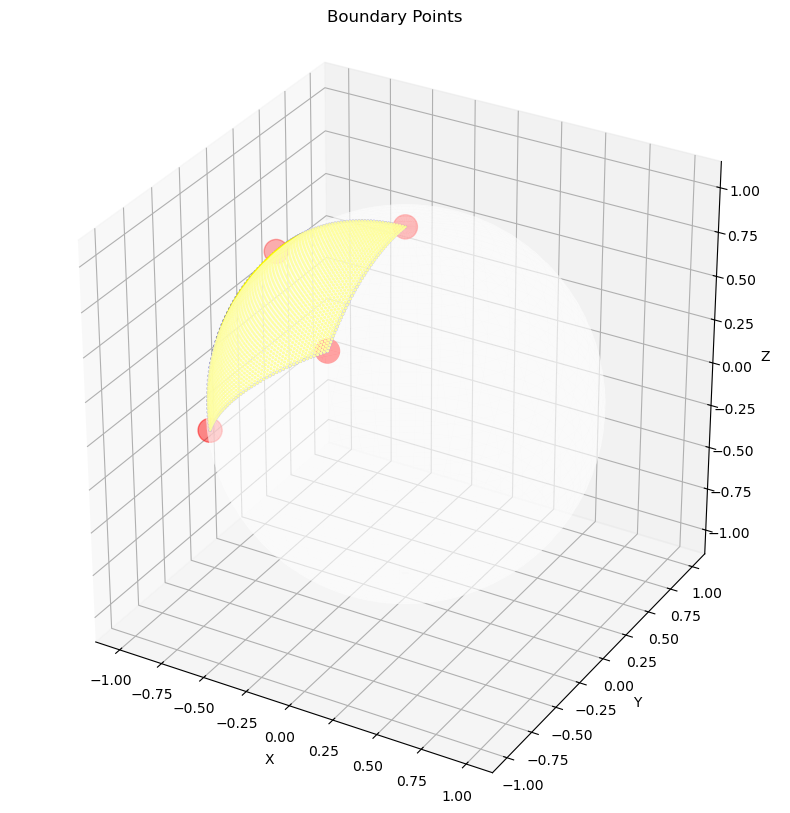

In [54]:
def main(order, i):
  
    # Create points for sphere
    theta = np.linspace(0, 2 * np.pi, 100)
    phi = np.linspace(0, np.pi, 50)
    theta, phi = np.meshgrid(theta, phi)
    r = 1
    # Convert to Cartesian coordinates
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    
    # Plot sphere
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap = mcolors.ListedColormap(['white']), alpha=0.4)
    
    
    points = getBoundaries(order, i)
    ax.scatter(points[0], points[1], points[2], c='red', s=300)
    
    arc12, arc23, arc34, arc41 = getArcs(points)
    # Plot the arcs
    ax.scatter(arc12[:, 0], arc12[:, 1], arc12[:, 2], color='blue', s = 2)
    ax.scatter(arc23[:, 0], arc23[:, 1], arc23[:, 2], color='blue', s =2)
    ax.scatter(arc34[:, 0], arc34[:, 1], arc34[:, 2], color='blue', s =2)
    ax.scatter(arc41[:, 0], arc41[:, 1], arc41[:, 2], color='blue', s = 2)
    # ax.scatter(arc41[40, 0], arc41[40, 1], arc41[40, 2], color='green', s = 100)
    # ax.scatter(arc12[40, 0], arc12[40, 1], arc12[40, 2], color='green', s = 100)
    # ax.scatter(arc23[40, 0], arc23[40, 1], arc23[40, 2], color='green', s = 100)
    # ax.scatter(arc34[40, 0], arc34[40, 1], arc34[40, 2], color='green', s = 100)
    
    


    new_points= getPoints(arc12, arc23, arc34, arc41, 50)
    # for i in range(5000):
    #     ax.scatter(new_points[i][0], new_points[i][1], new_points[i][2], c=np.random.rand(3,), s=1)
    print(type(new_points))
    print(type(arc12))
    ax.scatter(new_points[:,0], new_points[:,1], new_points[:,2], color = 'yellow', s=1)
        
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Boundary Points')
    ax.set_box_aspect((1, 1, 1))
    plt.show()

main(0,2)

In [10]:
def getBoundaries(order, i):
    x_coor = []
    y_coor = []
    z_coor = []
    # for i in range(hp.order2npix(order)):
    test = hp.boundaries(hp.order2nside(order), i, step=1)
    x_coor.extend(test[0])
    y_coor.extend(test[1])
    z_coor.extend(test[2])
    
    return x_coor, y_coor, z_coor

In [7]:
def getArcs(points):
    
    p1, p2, p3, p4= np.transpose(points)
    arc12 = great_circle_arc(p1, p2)
    arc23 = great_circle_arc(p2, p3)
    arc34 = great_circle_arc(p3, p4)
    arc41 = great_circle_arc(p4, p1)
    
    return arc12, arc23, arc34, arc41
    

In [51]:
def getPoints(arc12, arc23, arc34, arc41, num_points):
    new_points = []
    for i in range(num_points):
        arc = great_circle_arc(arc12[i], arc34[49 - i])
        new_points.extend(arc)
        
    for i in range(num_points):
        arc = great_circle_arc(arc23[i], arc41[49 - i])
        new_points.extend(arc)




    

                
                    
    return np.array(new_points)

In [9]:
def great_circle_arc(p1, p2, num_points=50):
    """Generates points along a great circle arc between two points."""
    p1_norm = p1 / np.linalg.norm(p1)
    p2_norm = p2 / np.linalg.norm(p2)
    points = []
    for i in range(num_points):
        t = i / (num_points - 1)
        # Linear interpolation and normalization
        pt = (1 - t) * p1_norm + t * p2_norm
        pt_norm = pt / np.linalg.norm(pt)
        points.append(pt_norm)
    return np.array(points)

In [36]:
great_circle_arc((-1,-1,-1), (1, 1, 1))

array([[-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.577